In [46]:
import os
os.chdir('/Users/macbookfausto/Desktop/Tareas')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df_eco= pd.read_csv('ecommerce_juguetes.csv')
df_eco.sample(5)

,ID_Orden,Producto,Categoria,Precio,Cantidad,Metodo_Pago,Estado_Envio,Fecha_Compra,Cliente_ID,Ciudad
167,168,Lego,Deportivo,1249.35,1,Transferencia,Pendiente,2022-01-19,1880,Puebla
561,562,Peluche,Interactivo,642.96,2,NaN,Pendiente,2023-10-08,1520,Puebla
107,108,Drone,Deportivo,4304.13,3,Contra entrega,Entregado,2022-12-21,1748,Monterrey
44,45,Bloques,Coleccionable,3286.44,1,Contra entrega,Entregado,2021-04-11,1259,Monterrey
679,680,Drone,Educativo,1567.27,4,PayPal,Entregado,2022-01-31,1869,Ciudad de México


In [3]:
df_eco.shape

(800, 10)

In [4]:
df_eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Orden      800 non-null    int64  
 1   Producto      800 non-null    object 
 2   Categoria     800 non-null    object 
 3   Precio        800 non-null    float64
 4   Cantidad      800 non-null    int64  
 5   Metodo_Pago   776 non-null    object 
 6   Estado_Envio  776 non-null    object 
 7   Fecha_Compra  800 non-null    object 
 8   Cliente_ID    800 non-null    int64  
 9   Ciudad        800 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 62.6+ KB


In [5]:
print('Existen ', df_eco.isnull().sum().sum(),'datos nulos')

Existen  48 datos nulos


In [6]:
df_eco.isnull().sum()

ID_Orden         0
Producto         0
Categoria        0
Precio           0
Cantidad         0
Metodo_Pago     24
Estado_Envio    24
Fecha_Compra     0
Cliente_ID       0
Ciudad           0
dtype: int64

In [7]:
df_eco['Metodo_Pago'].value_counts()

Tarjeta de crédito    170
PayPal                159
Transferencia         157
Contra entrega        150
Tarjeta de débito     140
Name: Metodo_Pago, dtype: int64

In [8]:
print('Los porcentajes son los siguientes: \n',  (df_eco['Metodo_Pago'].value_counts()/800)*100)

Los porcentajes son los siguientes: 
 Tarjeta de crédito    21.250
PayPal                19.875
Transferencia         19.625
Contra entrega        18.750
Tarjeta de débito     17.500
Name: Metodo_Pago, dtype: float64


In [9]:
df_eco['Estado_Envio'].value_counts()

Entregado    205
Pendiente    192
Enviado      192
Devuelto     187
Name: Estado_Envio, dtype: int64

In [10]:
print('Los porcentajes son los siguientes: \n',  (df_eco['Estado_Envio'].value_counts()/800)*100)

Los porcentajes son los siguientes: 
 Entregado    25.625
Pendiente    24.000
Enviado      24.000
Devuelto     23.375
Name: Estado_Envio, dtype: float64


In [11]:
#Indices

print(df_eco[df_eco['Metodo_Pago'].isna()].index.to_list())
Nulos_MP = df_eco[df_eco['Metodo_Pago'].isna()].index.to_list()

print(df_eco[df_eco['Estado_Envio'].isna()].index.to_list())
Nulos_EE = df_eco[df_eco['Estado_Envio'].isna()].index.to_list()

df_mid = df_eco.loc[df_eco['Ciudad']== 'Mérida'].index.to_list()
df_mex = df_eco.loc[df_eco['Ciudad']== 'Ciudad de México'].index.to_list()
df_Gua = df_eco.loc[df_eco['Ciudad']== 'Guadalajara'].index.to_list()
df_PU = df_eco.loc[df_eco['Ciudad']== 'Puebla'].index.to_list()
df_MT = df_eco.loc[df_eco['Ciudad']== 'Monterrey'].index.to_list()


[32, 81, 105, 120, 137, 173, 222, 228, 231, 255, 266, 354, 377, 390, 391, 504, 534, 561, 609, 624, 728, 746, 786, 798]
[9, 81, 89, 96, 176, 182, 189, 308, 313, 323, 333, 366, 391, 398, 441, 493, 520, 528, 543, 602, 635, 707, 745, 748]


In [12]:
df_eco['Ciudad'].value_counts()

Monterrey           199
Puebla              163
Ciudad de México    160
Mérida              155
Guadalajara         123
Name: Ciudad, dtype: int64

In [13]:
df_eco.loc[Nulos_MP]

,ID_Orden,Producto,Categoria,Precio,Cantidad,Metodo_Pago,Estado_Envio,Fecha_Compra,Cliente_ID,Ciudad
32,33,Pelota,Interactivo,3100.06,4,NaN,Entregado,2021-04-20,1672,Puebla
81,82,Figura de acción,Educativo,3309.55,2,NaN,NaN,2023-11-28,1985,Mérida
105,106,Pelota,Interactivo,1629.53,3,NaN,Enviado,2023-01-28,1598,Guadalajara
120,121,Bloques,Deportivo,2302.23,2,NaN,Devuelto,2023-04-07,1541,Mérida
137,138,Pelota,Coleccionable,702.56,3,NaN,Pendiente,2022-04-26,1160,Guadalajara
173,174,Muñeca,Interactivo,185.83,1,NaN,Devuelto,2023-12-04,1171,Guadalajara
222,223,Figura de acción,Educativo,2757.58,1,NaN,Enviado,2021-07-29,1395,Ciudad de México
228,229,Bloques,Electrónico,830.06,3,NaN,Pendiente,2022-04-17,1066,Ciudad de México
231,232,Muñeca,Deportivo,2435.81,3,NaN,Pendiente,2023-07-12,1121,Mérida
255,256,Rompecabezas,Educativo,3616.42,4,NaN,Enviado,2022-03-10,1789,Puebla


In [14]:
#df_eco['Ciudad'].sort_values(ascending=True).value_counts()
df_mid = df_eco.loc[df_eco['Ciudad']== 'Mérida'].index.to_list()
df_eco.loc[df_mid].sort_values(by= 'Metodo_Pago')

,ID_Orden,Producto,Categoria,Precio,Cantidad,Metodo_Pago,Estado_Envio,Fecha_Compra,Cliente_ID,Ciudad
444,445,Drone,Deportivo,465.69,1,Contra entrega,Pendiente,2021-05-30,1049,Mérida
540,541,Peluche,Educativo,3934.18,2,Contra entrega,Enviado,2023-10-09,1069,Mérida
313,314,Bloques,Coleccionable,3650.13,4,Contra entrega,NaN,2023-06-12,1993,Mérida
179,180,Peluche,Coleccionable,3998.00,3,Contra entrega,Entregado,2023-06-23,1184,Mérida
471,472,Lego,Interactivo,2952.53,1,Contra entrega,Entregado,2022-10-01,1961,Mérida
...,...,...,...,...,...,...,...,...,...,...
377,378,Carrito,Interactivo,1966.46,3,NaN,Devuelto,2022-02-23,1890,Mérida
390,391,Figura de acción,Educativo,2555.65,4,NaN,Pendiente,2023-05-30,1293,Mérida
609,610,Drone,Interactivo,2834.41,4,NaN,Entregado,2023-03-29,1073,Mérida
746,747,Bloques,Electrónico,2027.89,3,NaN,Enviado,2023-11-10,1058,Mérida


In [43]:
#Filtro de ciudades Pago

MID =df_eco.loc[df_eco['Ciudad']== 'Mérida']
Gua =df_eco.loc[df_eco['Ciudad']== 'Guadalajara']
Mex =df_eco.loc[df_eco['Ciudad']== 'Ciudad de México']
PU =df_eco.loc[df_eco['Ciudad']== 'Puebla']
MT =df_eco.loc[df_eco['Ciudad']== 'Monterrey']

#print('Merida', MID.isnull().sum(),'\nGuadalajara', Gua.isnull().sum(),'\nMex',Mex.isnull().sum(),'\nPuebla',PU.isnull().sum(),'\nMt',MT.isnull().sum())



In [16]:
#En Merida
print(MID['Metodo_Pago'].value_counts()/(155)*100)
print(MID['Estado_Envio'].value_counts()/(155)*100)

Transferencia         23.225806
PayPal                19.354839
Tarjeta de crédito    18.709677
Contra entrega        17.419355
Tarjeta de débito     16.129032
Name: Metodo_Pago, dtype: float64
Enviado      29.032258
Devuelto     25.806452
Pendiente    20.645161
Entregado    19.354839
Name: Estado_Envio, dtype: float64


In [17]:
#En Guadalajara
print(Gua['Metodo_Pago'].value_counts()/(123)*100)
print(Gua['Estado_Envio'].value_counts()/(123)*100)


Tarjeta de crédito    24.390244
Contra entrega        20.325203
PayPal                19.512195
Tarjeta de débito     18.699187
Transferencia         14.634146
Name: Metodo_Pago, dtype: float64
Pendiente    27.642276
Devuelto     26.016260
Entregado    22.764228
Enviado      18.699187
Name: Estado_Envio, dtype: float64


In [18]:
#En CDMX
print(Mex['Metodo_Pago'].value_counts()/(len(Mex))*100)
print(Mex['Estado_Envio'].value_counts()/(len(Mex))*100)


PayPal                21.875
Tarjeta de débito     19.375
Transferencia         19.375
Contra entrega        18.125
Tarjeta de crédito    18.125
Name: Metodo_Pago, dtype: float64
Entregado    32.500
Pendiente    23.125
Devuelto     22.500
Enviado      20.000
Name: Estado_Envio, dtype: float64


In [19]:
#En Puebla
print(PU['Metodo_Pago'].value_counts()/(len(PU))*100)
print(PU['Estado_Envio'].value_counts()/(len(PU))*100)


Tarjeta de crédito    23.312883
PayPal                20.858896
Transferencia         20.858896
Contra entrega        17.177914
Tarjeta de débito     14.723926
Name: Metodo_Pago, dtype: float64
Entregado    26.380368
Pendiente    25.153374
Devuelto     23.926380
Enviado      22.699387
Name: Estado_Envio, dtype: float64


In [20]:
#En MTY
print(MT['Metodo_Pago'].value_counts()/(len(MT))*100)
print(MT['Estado_Envio'].value_counts()/(len(MT))*100)

Tarjeta de crédito    22.110553
Contra entrega        20.603015
Transferencia         19.095477
Tarjeta de débito     18.592965
PayPal                18.090452
Name: Metodo_Pago, dtype: float64
Enviado      27.638191
Entregado    26.130653
Pendiente    24.120603
Devuelto     20.100503
Name: Estado_Envio, dtype: float64


In [21]:
df_eco.loc[Nulos_EE].sort_values(by='Ciudad')

,ID_Orden,Producto,Categoria,Precio,Cantidad,Metodo_Pago,Estado_Envio,Fecha_Compra,Cliente_ID,Ciudad
707,708,Rompecabezas,Coleccionable,3559.49,4,Tarjeta de débito,NaN,2023-01-01,1517,Ciudad de México
89,90,Rompecabezas,Interactivo,3902.40,2,Contra entrega,NaN,2021-12-11,1202,Ciudad de México
520,521,Lego,Educativo,3329.27,4,Transferencia,NaN,2022-06-04,1181,Ciudad de México
9,10,Pelota,Electrónico,2717.79,1,PayPal,NaN,2021-10-03,1245,Guadalajara
441,442,Carrito,Deportivo,1557.04,3,Contra entrega,NaN,2022-02-20,1434,Guadalajara
333,334,Juego de mesa,Deportivo,1428.62,4,Tarjeta de crédito,NaN,2021-01-08,1969,Guadalajara
308,309,Juego de mesa,Educativo,1445.25,1,Tarjeta de crédito,NaN,2021-04-18,1731,Guadalajara
748,749,Rompecabezas,Electrónico,3959.79,1,Tarjeta de débito,NaN,2021-07-30,1904,Guadalajara
176,177,Muñeca,Electrónico,4336.58,2,Tarjeta de crédito,NaN,2023-09-01,1425,Guadalajara
323,324,Bloques,Electrónico,3019.18,3,PayPal,NaN,2021-10-05,1428,Monterrey


In [22]:
#Diccionario para Estado de envio 

valores_ciudad = {
    "Merida": "Enviado",
    "Monterrey": "Enviado"
    ,"Puebla": "Entregado",
    "Ciudad de México": "Entregado",
    "Guadalajara": "Pendiente"}


In [24]:
df_eco['Metodo_Pago']= df_eco['Metodo_Pago'].fillna('Transferencia')
df_eco.isnull().sum()

ID_Orden         0
Producto         0
Categoria        0
Precio           0
Cantidad         0
Metodo_Pago      0
Estado_Envio    24
Fecha_Compra     0
Cliente_ID       0
Ciudad           0
dtype: int64

In [25]:
df_eco['Estado_Envio']= df_eco['Estado_Envio'].fillna('Entregado')
df_eco.isnull().sum()

ID_Orden        0
Producto        0
Categoria       0
Precio          0
Cantidad        0
Metodo_Pago     0
Estado_Envio    0
Fecha_Compra    0
Cliente_ID      0
Ciudad          0
dtype: int64

In [26]:
df_eco.loc[Nulos_EE].sort_values(by='Ciudad')

,ID_Orden,Producto,Categoria,Precio,Cantidad,Metodo_Pago,Estado_Envio,Fecha_Compra,Cliente_ID,Ciudad
707,708,Rompecabezas,Coleccionable,3559.49,4,Tarjeta de débito,Entregado,2023-01-01,1517,Ciudad de México
89,90,Rompecabezas,Interactivo,3902.40,2,Contra entrega,Entregado,2021-12-11,1202,Ciudad de México
520,521,Lego,Educativo,3329.27,4,Transferencia,Entregado,2022-06-04,1181,Ciudad de México
9,10,Pelota,Electrónico,2717.79,1,PayPal,Entregado,2021-10-03,1245,Guadalajara
441,442,Carrito,Deportivo,1557.04,3,Contra entrega,Entregado,2022-02-20,1434,Guadalajara
333,334,Juego de mesa,Deportivo,1428.62,4,Tarjeta de crédito,Entregado,2021-01-08,1969,Guadalajara
308,309,Juego de mesa,Educativo,1445.25,1,Tarjeta de crédito,Entregado,2021-04-18,1731,Guadalajara
748,749,Rompecabezas,Electrónico,3959.79,1,Tarjeta de débito,Entregado,2021-07-30,1904,Guadalajara
176,177,Muñeca,Electrónico,4336.58,2,Tarjeta de crédito,Entregado,2023-09-01,1425,Guadalajara
323,324,Bloques,Electrónico,3019.18,3,PayPal,Entregado,2021-10-05,1428,Monterrey


In [156]:
df_eco.loc[Nulos_EE].sort_values(by='Ciudad')

,ID_Orden,Producto,Categoria,Precio,Cantidad,Metodo_Pago,Estado_Envio,Fecha_Compra,Cliente_ID,Ciudad
707,708,Rompecabezas,Coleccionable,3559.49,4,Tarjeta de débito,Entregado,2023-01-01,1517,Ciudad de México
89,90,Rompecabezas,Interactivo,3902.40,2,Contra entrega,Entregado,2021-12-11,1202,Ciudad de México
520,521,Lego,Educativo,3329.27,4,Transferencia,Entregado,2022-06-04,1181,Ciudad de México
9,10,Pelota,Electrónico,2717.79,1,PayPal,Entregado,2021-10-03,1245,Guadalajara
441,442,Carrito,Deportivo,1557.04,3,Contra entrega,Entregado,2022-02-20,1434,Guadalajara
333,334,Juego de mesa,Deportivo,1428.62,4,Tarjeta de crédito,Entregado,2021-01-08,1969,Guadalajara
308,309,Juego de mesa,Educativo,1445.25,1,Tarjeta de crédito,Entregado,2021-04-18,1731,Guadalajara
748,749,Rompecabezas,Electrónico,3959.79,1,Tarjeta de débito,Entregado,2021-07-30,1904,Guadalajara
176,177,Muñeca,Electrónico,4336.58,2,Tarjeta de crédito,Entregado,2023-09-01,1425,Guadalajara
323,324,Bloques,Electrónico,3019.18,3,PayPal,Entregado,2021-10-05,1428,Monterrey


In [158]:
#Suponemos que los datos rellenados fueron para MEtodo de pago la Transferencia y para Estado de envio Entregado

df_eco.isnull().sum().sum()

0

In [27]:
df_eco[['Producto']].value_counts()

Producto        
Muñeca              97
Rompecabezas        90
Bloques             89
Pelota              87
Juego de mesa       80
Figura de acción    75
Drone               74
Lego                70
Peluche             70
Carrito             68
dtype: int64

In [39]:
df_eco.groupby(['Ciudad']).sum()['Precio']

/var/folders/tr/f5pptkxn5fj7wfhv8fk1y6gm0000gn/T/ipykernel_1815/1974584317.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_eco.groupby(['Ciudad']).sum()['Precio']


Ciudad
Ciudad de México    417775.97
Guadalajara         286026.38
Monterrey           503557.24
Mérida              397289.07
Puebla              406669.70
Name: Precio, dtype: float64

/var/folders/tr/f5pptkxn5fj7wfhv8fk1y6gm0000gn/T/ipykernel_1815/2995920249.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_eco.groupby(['Producto']).sum()['Cantidad'].sort_values(ascending=False).head(10).plot.bar(title= 'Top 10 en productos mas vendidos')


<Axes: title={'center': 'Top 10 en productos mas vendidos'}, xlabel='Producto'>

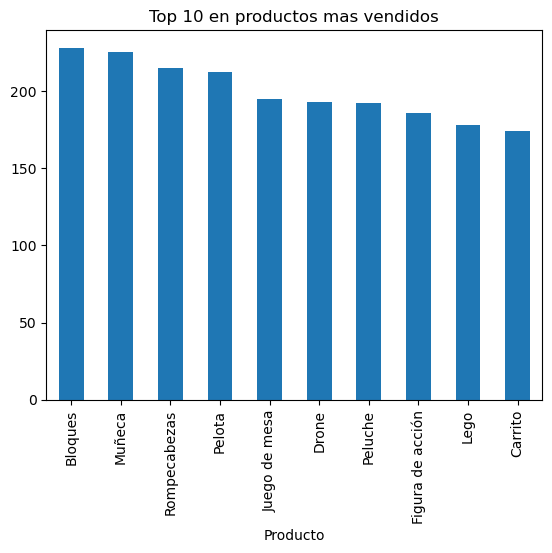

In [30]:
#Graficamos el top 10 de articulos 

df_eco.groupby(['Producto']).sum()['Cantidad'].sort_values(ascending=False).head(10).plot.bar(title= 'Top 10 en productos mas vendidos')

/var/folders/tr/f5pptkxn5fj7wfhv8fk1y6gm0000gn/T/ipykernel_1815/3020084852.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_eco.groupby(['Ciudad']).sum()['Precio'].sort_values(ascending=False).head(10).plot.bar(title= 'Mayores Ganancias por ciudad')


<Axes: title={'center': 'Mayores Ganancias por ciudad'}, xlabel='Ciudad'>

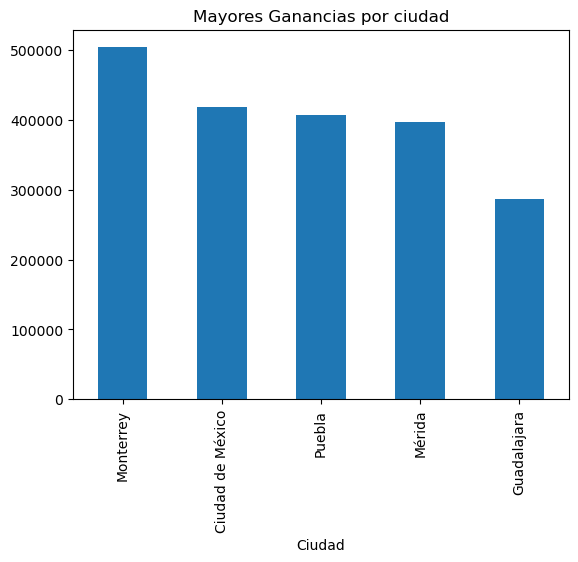

In [41]:
df_eco.groupby(['Ciudad']).sum()['Precio'].sort_values(ascending=False).head(10).plot.bar(title= 'Mayores Ganancias por ciudad')

/var/folders/tr/f5pptkxn5fj7wfhv8fk1y6gm0000gn/T/ipykernel_1815/1743512728.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_eco.groupby(['Producto']).sum()['Precio'].sort_values(ascending=False).head(10).plot.bar(title= 'Mayores Ganancias por producto')


<Axes: title={'center': 'Mayores Ganancias por producto'}, xlabel='Producto'>

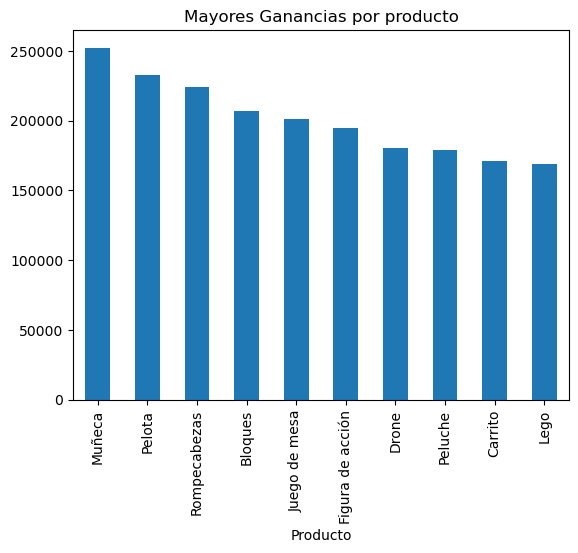

In [42]:
df_eco.groupby(['Producto']).sum()['Precio'].sort_values(ascending=False).head(10).plot.bar(title= 'Mayores Ganancias por producto')

/var/folders/tr/f5pptkxn5fj7wfhv8fk1y6gm0000gn/T/ipykernel_1815/3112399445.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MID.groupby(['Producto']).sum()['Precio'].sort_values(ascending=False).head(10).plot.bar(title= 'Mayores Ganancias por producto')


<Axes: title={'center': 'Mayores Ganancias por producto'}, xlabel='Producto'>

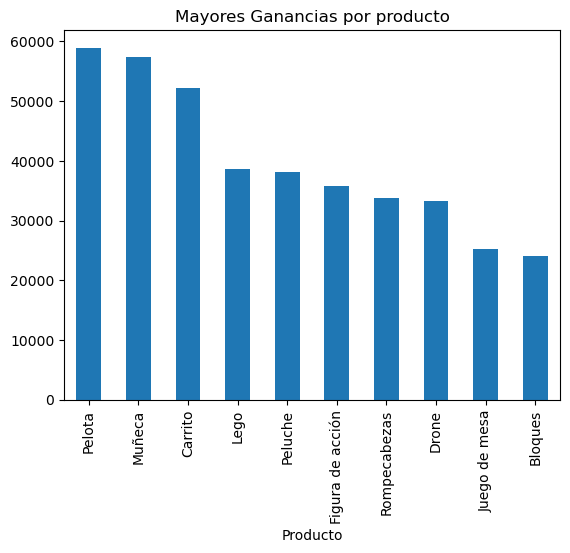

In [44]:
MID.groupby(['Producto']).sum()['Precio'].sort_values(ascending=False).head(10).plot.bar(title= 'Mayores Ganancias por producto')

In [49]:
#ticket de costo promedio por linea de producto y ciudad
fig =px.bar(df_eco, x= 'Producto',y = 'Cantidad',title = 'Cantidad de productos más vendidos', color ='Ciudad')
fig.show()

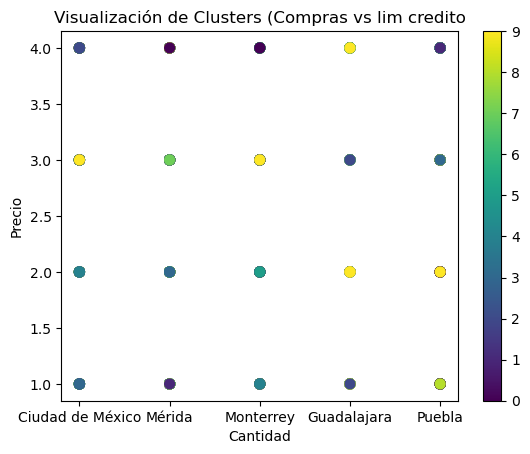

In [56]:
df_eco2 = df_eco.copy()
df_eco2['Producto'] = df_eco2['Producto'].astype('category').cat.codes

fig = plt. figure()
ax = fig.add_subplot (111)
scatter = ax.scatter(df_eco2['Ciudad'],df_eco2['Cantidad'], c=df_eco2['Producto'], s=50)
ax.set_title('Visualización de Clusters (Compras vs lim credito')
ax.set_xlabel ('Cantidad')
ax.set_ylabel('Precio')
plt.colorbar(scatter)